## Bloco 2 - aprendizado de máquina

<a id='sum'>Sumário</a>

1. [Redução de dimensionalidade](#reducao)
2. [Agrupamento (clustering)](#clustering)
3. [Detecção de outliers](#outliers)


De início, é válido ressaltar que, assim como concluido a partir das discussões finais do Bloco 2, iremos continuar as próximas práticas e tarefas utilizando apenas o ***dataset*** referente aos genes que demonstravam mudanças em expressão gênica conforme a  

### <a id='reducao'>Redução de dimensionalidade</a>

[Voltar](#sum)

Para começar, vamos partir pela importação dos dados a serem utilizados por nós, referentes ao *dataset* com os dados dos genes que obtivemos a partir de pesquisas na literatura, utilizando a conversão randômica para transformar nossos dados categóricos em valores numéricos (para o "data_artigo.csv") aleatórios dentre o intervalo estabelecido, uma vez que através da aplicação desse método fomos capazes de obter valores menores de RMSE (root mean squared error), implicando em uma maior eficiência.

In [35]:
# Importando as bibliotecas e módulos a serem utilizados para a realização do treino, teste e baseline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

In [36]:
df_art = pd.read_csv('data_artigo.csv') #Importando o dataframe do arquivo "data_artigo.csv"
df_art = df_art.drop("Unnamed: 0",axis=1)

In [37]:
# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos - para o "data_artigo.csv"
df_art['Idade']=df_art['Idade'].replace('20-29',random.randint(20, 29))
df_art['Idade']=df_art['Idade'].replace('30-39',random.randint(30, 39))
df_art['Idade']=df_art['Idade'].replace('40-49',random.randint(40, 49))
df_art['Idade']=df_art['Idade'].replace('50-59',random.randint(50, 59))
df_art['Idade']=df_art['Idade'].replace('60-69',random.randint(60, 69))
df_art['Idade']=df_art['Idade'].replace('70-79',random.randint(70, 79))
df_art

,Amostra,Sexo,Categoria Idade,Idade,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,GTEX-U8XE,male,Jovem,37,0.415301,1.959855e-02,0.609227,8.821049e-02,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,GTEX-UPJH,male,Adulto,51,0.000005,7.996788e-03,0.159422,3.882611e-02,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,GTEX-UPK5,male,Adulto,42,0.000000,7.149739e-03,0.000003,4.746163e-02,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,GTEX-V1D1,male,Adulto,51,0.000000,0.000000e+00,0.062979,1.321471e-06,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,GTEX-VJYA,male,Idoso,61,0.000000,1.969892e-02,0.329350,3.710575e-02,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,GTEX-ZYVF,female,Adulto,51,0.000024,1.819350e-07,0.142913,2.020577e-02,0.000032,0.095750,0.363183,0.539107,0.547407,0.106089,0.242711
106,GTEX-ZYW4,male,Idoso,61,0.000023,5.150542e-03,0.168872,5.422500e-02,0.000013,0.103609,0.250000,0.706623,0.785079,0.312058,0.371003
107,GTEX-ZYY3,female,Idoso,61,0.000003,2.070253e-07,0.071373,8.591668e-07,0.000021,0.000006,0.754844,0.472580,0.506640,0.312230,0.363262
108,GTEX-ZZ64,male,Jovem,25,0.000001,3.753111e-02,0.185770,2.604149e-02,0.000039,0.289014,0.354081,0.503746,0.718097,0.037088,0.377036


Uma vez que é necessário utilizar tanto apenas os valores do dataframe quanto a variável com as colunas, criamos a variável `X` e `X_vals`.

In [38]:
X = df_art.reindex(df_art.columns[4:],axis=1)
X_vals = X.values
X

,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,0.415301,1.959855e-02,0.609227,8.821049e-02,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,0.000005,7.996788e-03,0.159422,3.882611e-02,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,0.000000,7.149739e-03,0.000003,4.746163e-02,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,0.000000,0.000000e+00,0.062979,1.321471e-06,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,0.000000,1.969892e-02,0.329350,3.710575e-02,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728
...,...,...,...,...,...,...,...,...,...,...,...
105,0.000024,1.819350e-07,0.142913,2.020577e-02,0.000032,0.095750,0.363183,0.539107,0.547407,0.106089,0.242711
106,0.000023,5.150542e-03,0.168872,5.422500e-02,0.000013,0.103609,0.250000,0.706623,0.785079,0.312058,0.371003
107,0.000003,2.070253e-07,0.071373,8.591668e-07,0.000021,0.000006,0.754844,0.472580,0.506640,0.312230,0.363262
108,0.000001,3.753111e-02,0.185770,2.604149e-02,0.000039,0.289014,0.354081,0.503746,0.718097,0.037088,0.377036


Como nossos dados já estão normalizados e organizados, vamos partir para a execução do PCA (*Principal Component Analysis*) em si.

In [39]:
pca = PCA()
pca.fit(X_vals)
X_pca = pca.transform(X_vals)

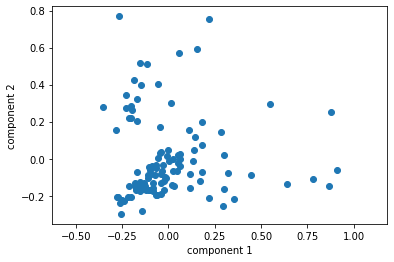

In [44]:
X_new = pca.inverse_transform(X_pca)
#plt.scatter(X_vals[:, 0], X_vals[:, 1]) #, alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1]) #, alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');
plt.show()

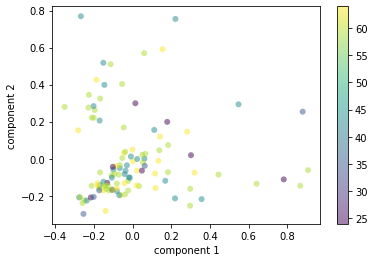

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_art["Idade"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

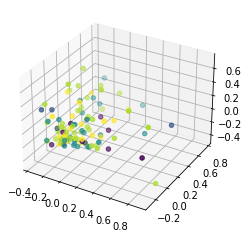

In [26]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_art["Idade"].values)
plt.show()

In [27]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
MMP1,0.517847,-0.075005,0.053235,0.358118,0.376301,-0.049861,0.276928,0.054666,-0.370031,-0.108067,-0.471973
MMP3,0.126310,-0.038212,-0.163574,0.149030,0.141333,-0.052699,0.465692,-0.096126,-0.043477,-0.370607,0.738592
MMP9,0.414063,0.130311,-0.031628,-0.049427,-0.160842,0.084154,0.403642,0.277159,0.677249,0.268560,-0.068124
MMP11,0.334351,-0.059619,0.173900,0.077451,0.496967,0.289233,-0.590866,0.150093,0.205057,0.051992,0.318404
MMP24,-0.241609,0.813929,0.188199,0.483125,0.074875,0.002807,-0.006320,0.020781,0.058948,-0.025189,0.011018
MMP27,0.420934,0.529231,-0.178706,-0.558279,-0.143408,0.194835,-0.093759,-0.061160,-0.322082,-0.153988,0.024738
BARD1,-0.096603,-0.129169,0.514526,0.028664,-0.238967,0.714096,0.251358,0.123398,-0.239087,0.026531,0.071498
BCL7C,-0.210442,0.009040,0.102844,-0.238281,0.125401,-0.156495,0.021489,0.772785,0.021039,-0.492394,-0.086655
CLPTM1L,-0.025473,0.066259,0.006327,-0.076746,0.109077,-0.256646,0.110017,0.385713,-0.416434,0.700645,0.293372
TERT,0.096160,0.045244,0.749435,-0.339094,0.139192,-0.416916,0.116155,-0.304973,0.098776,-0.028511,0.042490


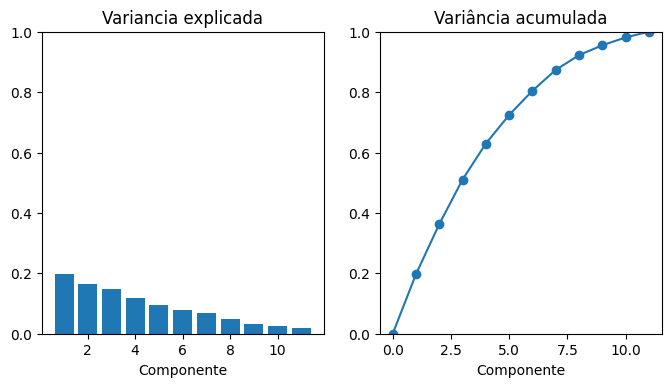

### <a id='clustering'>Agrupamento (clustering)</a>

[Voltar](#sum)

### <a id='outliers'>Detecção de outliers</a>

[Voltar](#sum)